Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\Devraj\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 170s 964ms/step - accuracy: 0.7402 - loss: 0.5887 - val_accuracy: 0.5000 - val_loss: 0.8508
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 867ms/step - accuracy: 0.7369 - loss: 0.5811 - val_accuracy: 0.5000 - val_loss: 0.8240
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 840ms/step - accuracy: 0.7480 - loss: 0.5692 - val_accuracy: 0.5000 - val_loss: 0.7701
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 837ms/step - accuracy: 0.7275 - loss: 0.5950 - val_accuracy: 0.5000 - val_loss: 0.8535
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 841ms/step - accuracy: 0.7407 - loss: 0.5838 - val_accuracy: 0.5000 - val_loss: 0.7865
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 858ms/step - accuracy: 0.7592 - loss: 0.5602 - val_accuracy: 0.5000 - val_loss: 0.7614
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 842ms/step - accuracy: 0.7506 - loss: 0.5718 - val_accuracy: 0.5000 - val_loss: 0.7903
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 847ms/step - accuracy: 0.7485 -

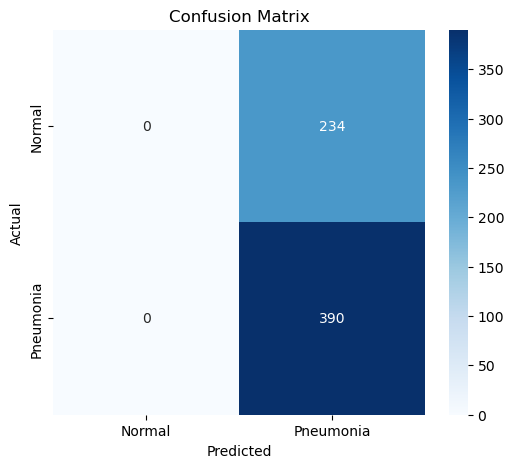

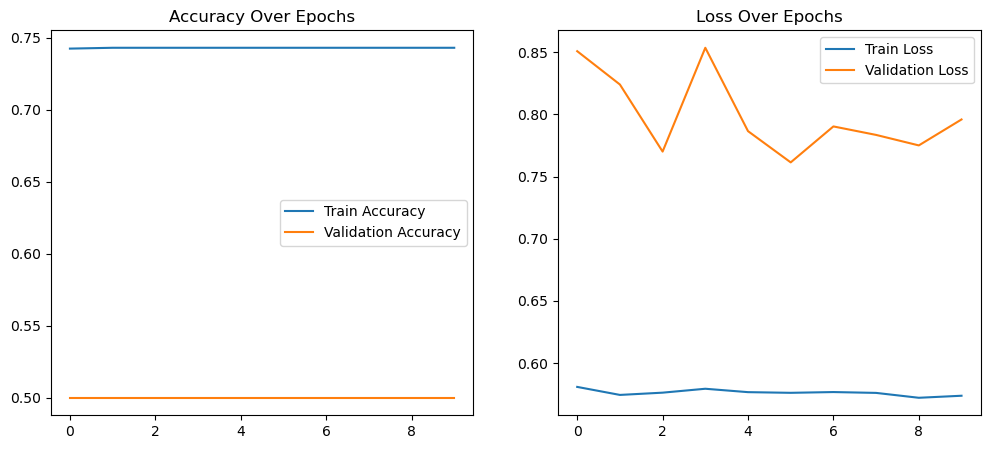

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       234
   Pneumonia       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



C:\Users\Devraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Devraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Devraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
import tensorflow as tf
import os
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Set dataset directory (Update this path)
dataset_path = "D://archive (11)//chest_xray"

# Define dataset paths
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")
# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)

train_data = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
val_data = datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

# Load Pretrained EfficientNetB0 Model
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

# Create Model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

# Evaluate Model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict on Test Data
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.show()


# Print Classification Report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))


In [12]:
model.save("EfficientNetB0_pneumonia_model.h5")

In [14]:
from tensorflow.keras.models import load_model

model = load_model("EfficientNetB0_pneumonia_model.h5")
print("Model loaded successfully!")

Model loaded successfully!


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\Devraj\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.7106 - loss: 0.6074 - val_accuracy: 0.5000 - val_loss: 0.7854
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7464 - loss: 0.5256 - val_accuracy: 0.5625 - val_loss: 0.6619
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7718 - loss: 0.4805 - val_accuracy: 0.5000 - val_loss: 0.8544
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7719 - loss: 0.4711 - val_accuracy: 0.6250 - val_loss: 0.8632
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.7830 - loss: 0.4545 - val_accuracy: 0.5625 - val_loss: 0.8264
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.7782 - loss: 0.4577 - val_accuracy: 0.5000 - val_loss: 0.9256
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7949 - loss: 0.4325 - val_accuracy: 0.6875 - val_loss: 0.6015
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.7843 - loss: 0.4404 - val_accu

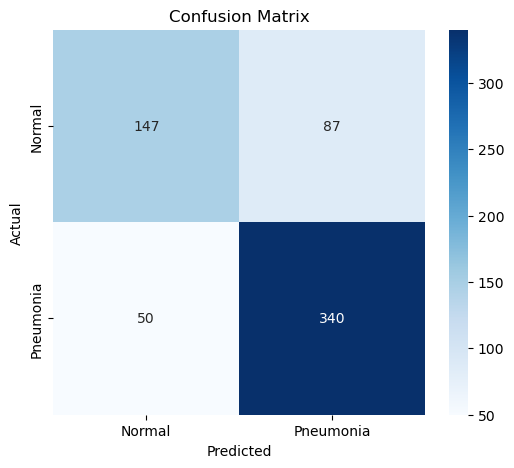

              precision    recall  f1-score   support

      Normal       0.75      0.63      0.68       234
   Pneumonia       0.80      0.87      0.83       390

    accuracy                           0.78       624
   macro avg       0.77      0.75      0.76       624
weighted avg       0.78      0.78      0.78       624



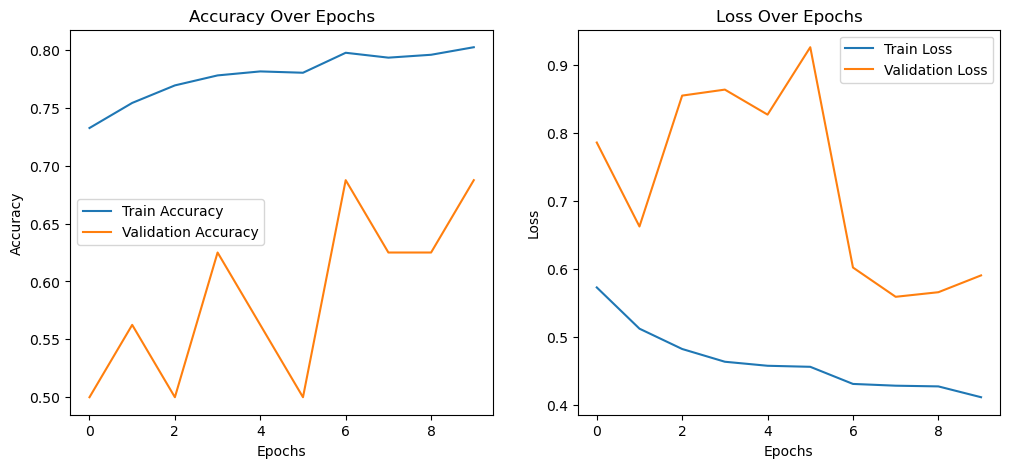

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Set dataset directory (Update this path)
dataset_path = "D://archive (11)//chest_xray"

# Define dataset paths
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)

train_data = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
val_data = datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

# Load Pretrained ResNet50 Model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

# Create Model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

# Evaluate Model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict on Test Data
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

plt.show()


In [ ]:
model.save("EfficientNetB_pneumonia_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("EfficientNetB0_pneumonia_model.h5")
print("Model loaded successfully!")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Classes: {'NORMAL': 0, 'PNEUMONIA': 1}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)             │ (None, 9, 9, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1920)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1920)                │           7,680 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,921 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,331,585 (69.93 MB)

 Trainable params: 607,681 (2.32 MB)

 Non-trainable params: 17,723,904 (67.61 MB)

C:\Users\Devraj\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.4974 - loss: 0.8544 - val_accuracy: 0.6250 - val_loss: 0.6632 - learning_rate: 1.0000e-05
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - accuracy: 0.6623 - loss: 0.5912 - val_accuracy: 0.6250 - val_loss: 0.6565 - learning_rate: 1.0000e-05
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.7228 - loss: 0.4985 - val_accuracy: 0.8125 - val_loss: 0.5354 - learning_rate: 1.0000e-05
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.7659 - loss: 0.4336 - val_accuracy: 0.6875 - val_loss: 0.5840 - learning_rate: 1.0000e-05
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 436s 3s/step - accuracy: 0.7786 - loss: 0.3923 - val_accuracy: 0.7500 - val_loss: 0.4255 - learning_rate: 1.0000e-05
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.8143 - loss: 0.3763 - val_accuracy: 0.9375 - val_loss: 0.3571 - learning_rate: 1.0000e-05
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - acc

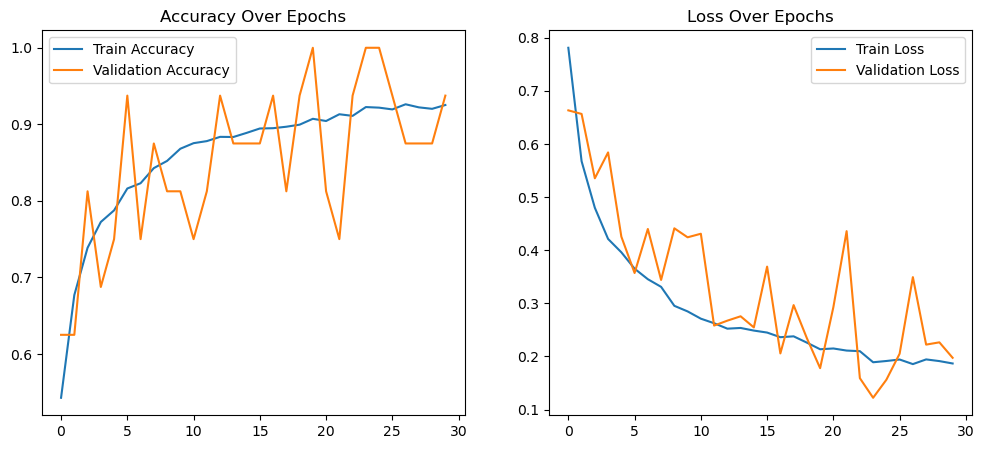

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model, Model

# ==========================
# 1️⃣ Paths
# ==========================
model_path = r"ResNet50_pneumonia_model.h5"
test_dir = r"D://archive (11)//chest_xray/test"
IMG_SIZE = (224, 224)

# ==========================
# 2️⃣ Load Model
# ==========================
model = load_model(model_path, compile=False)
model.summary()

# ==========================
# 3️⃣ Grad-CAM Function
# ==========================
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv5_block3_out"):
    grad_model = Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array)
        class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# ==========================
# 4️⃣ Load a Sample Test Image
# ==========================
sample_class = "PNEUMONIA"  # try NORMAL also
sample_path = os.path.join(test_dir, sample_class, os.listdir(os.path.join(test_dir, sample_class))[0])
print("Using test image:", sample_path)

img = tf.keras.preprocessing.image.load_img(sample_path, target_size=IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
input_tensor = np.expand_dims(img_array, axis=0)

# ==========================
# 5️⃣ Grad-CAM heatmap
# ==========================
heatmap = make_gradcam_heatmap(input_tensor, model)

# Resize heatmap
heatmap = cv2.resize(heatmap, IMG_SIZE)
heatmap = np.uint8(255 * heatmap)

# Colorize heatmap
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

# Overlay
superimposed_img = heatmap_color * 0.4 + (img_array * 255).astype("uint8")

# ==========================
# 6️⃣ Display
# ==========================
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_array)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(superimposed_img.astype("uint8"))
plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
model.save("densenet_pneumonia_model.h5")

In [6]:
from tensorflow.keras.models import load_model

model = load_model("densenet_pneumonia_model.h5")
print("Model loaded successfully!")

Model loaded successfully!


In [8]:
model.save("densenet_pneumonia_model.keras")
model = load_model("densenet_pneumonia_model.keras")

C:\Users\Devraj\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 44 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
# Save model without optimizer state
model.save("densenet_pneumonia_model.keras", include_optimizer=False)

# Load model without warnings
model = load_model("densenet_pneumonia_model.keras", compile=False)

# Recompile before training or inference
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
import os

model_path = "densenet_pneumonia_model.keras"

if os.path.exists(model_path):
    print("✅ Model saved successfully!")
else:
    print("❌ Model saving failed.")

✅ Model saved successfully!


In [14]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("densenet_pneumonia_model.keras", compile=False)

# Print model summary to verify
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)             │ (None, 9, 9, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1920)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1920)                │           7,680 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,921 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,331,585 (69.93 MB)

 Trainable params: 607,681 (2.32 MB)

 Non-trainable params: 17,723,904 (67.61 MB)

In [2]:
pip install timm tensorflow keras numpy matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.0/2.4 MB 2.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.4 MB 2.2 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.4 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install timm torch torchvision torchaudio tensorflow numpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
import timm
import numpy as np
import cv2
import os

# Load Pretrained Swin Transformer
swin_model = timm.create_model("swin_small_patch4_window7_224", pretrained=True)
swin_model.eval()  # Set to evaluation mode

# Dataset Paths
dataset_path = "D://archive (11)//chest_xray"
splits = ["train", "val", "test"]  # Process all dataset splits

# Function to Extract Features
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize to match Swin Transformer input
    img = np.transpose(img, (2, 0, 1))  # Convert (H, W, C) → (C, H, W)
    img = torch.tensor(img).float().unsqueeze(0) / 255.0  # Normalize & add batch dimension
    with torch.no_grad():
        features = swin_model.forward_features(img)  # Extract Swin features
    return features.numpy()

# Process All Splits (train, val, test)
for split in splits:
    split_dir = os.path.join(dataset_path, split)  # Path to train, val, test
    save_dir = f"D://archive (11)//features/{split}"  # Save extracted features
    os.makedirs(save_dir, exist_ok=True)

    # Process Each Class (NORMAL, PNEUMONIA)
    for class_name in ["NORMAL", "PNEUMONIA"]:
        class_dir = os.path.join(split_dir, class_name)
        class_save_dir = os.path.join(save_dir, class_name)
        os.makedirs(class_save_dir, exist_ok=True)

        # Extract Features for Each Image
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            features = extract_features(img_path)
            np.save(os.path.join(class_save_dir, filename.replace(".jpeg", ".npy")), features)  # Save as .npy

print("Feature extraction complete! ✅")


model.safetensors:   0%|          | 0.00/81.1M [00:00<?, ?B/s]

C:\Users\Devraj\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Devraj\.cache\huggingface\hub\models--timm--densenet201.tv_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 37632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │      19,268,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,435,521 (74.14 MB)

 Trainable params: 19,433,985 (74.13 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.7753 - loss: 0.2033 - val_accuracy: 0.8125 - val_loss: 0.0776 - learning_rate: 1.0000e-04
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.9093 - loss: 0.0712 - val_accuracy: 0.8750 - val_loss: 0.0704 - learning_rate: 9.9901e-05
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9258 - loss: 0.0521 - val_accuracy: 0.9375 - val_loss: 0.0403 - learning_rate: 9.9606e-05
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9450 - loss: 0.0385 - val_accuracy: 0.8750 - val_loss: 0.0297 - learning_rate: 9.9114e-05
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9606 - loss: 0.0316 - val_accuracy: 0.9375 - val_loss: 0.0495 - learning_rate: 9.8429e-05
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.9628 - loss: 0.0254 - val_accuracy: 0.9375 - val_loss: 0.0649 - learning_rate: 9.7553e-05
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 

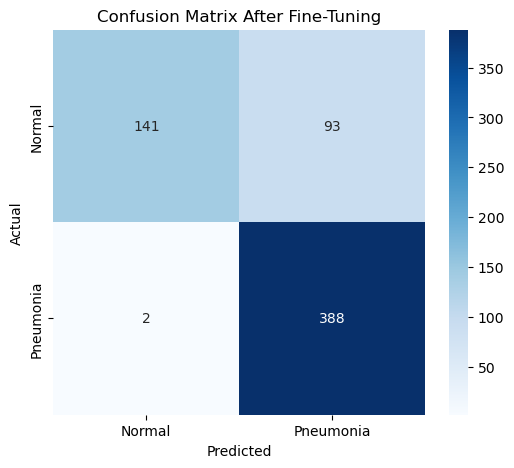

              precision    recall  f1-score   support

      Normal       0.99      0.60      0.75       234
   Pneumonia       0.81      0.99      0.89       390

    accuracy                           0.85       624
   macro avg       0.90      0.80      0.82       624
weighted avg       0.87      0.85      0.84       624



In [6]:
import torch
import timm
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Flatten
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.losses import BinaryFocalCrossentropy
from sklearn.utils.class_weight import compute_class_weight

# ✅ Load DenseNet201 Instead of Swin Transformer
densenet_model = timm.create_model("densenet201", pretrained=True)
for param in densenet_model.parameters():
    param.requires_grad = False  # Freeze all layers

densenet_model.eval()

# Paths
feature_dir = "D://archive (11)//features"
splits = ["train", "val", "test"]

# ✅ Function to Extract Intermediate Features from DenseNet201
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.transpose(img, (2, 0, 1))  
    img = torch.tensor(img).float().unsqueeze(0) / 255.0  
    with torch.no_grad():
        features = densenet_model.forward_features(img)  # Extract Intermediate Features
    return features.numpy()

# ✅ Load Features
def load_features(split):
    labels = []
    features = []
    
    for class_name in ["NORMAL", "PNEUMONIA"]:
        class_dir = os.path.join(feature_dir, split, class_name)
        for filename in os.listdir(class_dir):
            filepath = os.path.join(class_dir, filename)
            feature = np.load(filepath)
            features.append(feature.flatten())  
            labels.append(1 if class_name == "PNEUMONIA" else 0)  

    return np.array(features), np.array(labels)

# ✅ Load Data
X_train, y_train = load_features("train")
X_val, y_val = load_features("val")
X_test, y_test = load_features("test")

# ✅ Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# ✅ Build Fully Connected (MLP) Model
input_layer = Input(shape=(X_train.shape[1],))

x = Dense(512, activation="relu")(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)

output = Dense(1, activation="sigmoid")(x)

# ✅ Use AdamW Optimizer + Class Weights
optimizer = AdamW(learning_rate=0.0001, weight_decay=1e-4, amsgrad=True)  

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=optimizer, loss=BinaryFocalCrossentropy(), metrics=["accuracy"])
model.summary()

# ✅ Learning Rate Scheduler
def cosine_lr_schedule(epoch, lr):
    return 0.0001 * (0.5 * (1 + np.cos(np.pi * epoch / 50)))

# ✅ Callbacks: Cosine LR + Early Stopping
callbacks = [
    LearningRateScheduler(cosine_lr_schedule),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

# ✅ Train Model with Class Weights
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128, callbacks=callbacks, class_weight=class_weights_dict)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy after Advanced Fine-Tuning: {test_acc * 100:.2f}%")

# ✅ Predict on Test Data
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()

# ✅ Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After Fine-Tuning")
plt.show()

# ✅ Print Classification Report
print(classification_report(y_test, y_pred, target_names=['Normal', 'Pneumonia']))


In [3]:
import torch
import timm
import numpy as np
import cv2
import os

# ============================
# 1. Load Pretrained ViT Model
# ============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vit_model = timm.create_model("vit_base_patch16_224", pretrained=True)
vit_model.reset_classifier(0)       # remove classification head
vit_model.eval()
vit_model.to(device)

# ImageNet normalization (ViT expects this)
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
IMAGENET_STD  = np.array([0.229, 0.224, 0.225], dtype=np.float32)

# ============================
# 2. Paths
# ============================
dataset_path = "C://archive (11)//chest_xray"
splits = ["train", "val", "test"]

# Save ViT features in a separate folder to avoid confusion with Swin features
feature_root = "D://archive (11)//vit_features"

# ============================
# 3. Feature Extraction Function
# ============================
def extract_vit_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to read image {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))

    img = img.astype(np.float32) / 255.0
    img = (img - IMAGENET_MEAN) / IMAGENET_STD  # normalize
    img = np.transpose(img, (2, 0, 1))          # (C, H, W)

    tensor = torch.from_numpy(img).unsqueeze(0).to(device)  # (1, 3, 224, 224)

    with torch.no_grad():
        feats = vit_model.forward_features(tensor)  # Usually (1, num_tokens, dim)

        # If it returns dict in your timm version, use:
        # feats = vit_model.forward_features(tensor)["x_norm_patchtokens"]

        if feats.dim() == 3:
            # (1, num_tokens, dim) -> (num_tokens, dim)
            tokens = feats.squeeze(0).cpu().numpy()
        else:
            # Fallback: if it returns pooled (1, dim), fake seq len = 1
            tokens = feats.unsqueeze(1).squeeze(0).cpu().numpy()  # (1, dim)

    return tokens   # shape: (num_tokens, dim)

# ============================
# 4. Process All Splits
# ============================
for split in splits:
    split_dir = os.path.join(dataset_path, split)
    save_dir = os.path.join(feature_root, split)
    os.makedirs(save_dir, exist_ok=True)

    for class_name in ["NORMAL", "PNEUMONIA"]:
        class_dir = os.path.join(split_dir, class_name)
        class_save_dir = os.path.join(save_dir, class_name)
        os.makedirs(class_save_dir, exist_ok=True)

        for filename in os.listdir(class_dir):
            if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
                continue

            img_path = os.path.join(class_dir, filename)

            try:
                features = extract_vit_features(img_path)  # (num_tokens, dim)
                base = os.path.splitext(filename)[0]
                np.save(os.path.join(class_save_dir, base + ".npy"), features)
            except Exception as e:
                print(f"[WARN] Skipping {img_path}: {e}")

print("✅ ViT feature extraction complete!")


✅ ViT feature extraction complete!


In [3]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Bidirectional, LSTM,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import BinaryFocalCrossentropy



In [5]:
# ===========================================
# 1️⃣ Paths
# ===========================================
feature_dir = r"D://archive (11)//vit_features"
splits = ["train", "val", "test"]

# ===========================================
# 2️⃣ Load Features
# ===========================================
def load_features(split):
    X = []
    y = []

    for class_name in ["NORMAL", "PNEUMONIA"]:
        class_dir = os.path.join(feature_dir, split, class_name)
        if not os.path.exists(class_dir):
            raise ValueError(f"Missing directory: {class_dir}")

        for filename in os.listdir(class_dir):
            if not filename.endswith(".npy"):
                continue

            filepath = os.path.join(class_dir, filename)
            feats = np.load(filepath)  # expected: (num_tokens, dim) or (1, num_tokens, dim)

            # ---- Fix shape if needed ----
            if feats.ndim == 3:
                # e.g., (1, T, D) -> (T, D)
                feats = feats.squeeze(0)
            elif feats.ndim == 1:
                # something wrong, skip
                print(f"[WARN] Skipping {filepath}, bad shape {feats.shape}")
                continue

            X.append(feats)
            y.append(1 if class_name == "PNEUMONIA" else 0)

    X = np.array(X, dtype=np.float32)  # (N, T, D)
    y = np.array(y, dtype=np.int32)

    print(f"{split.upper()} -> X: {X.shape}, y: {y.shape}, positives: {np.sum(y)}")
    return X, y

print("🔄 Loading features...")
X_train, y_train = load_features("train")
X_val, y_val = load_features("val")
X_test, y_test = load_features("test")

# ===========================================
# 3️⃣ Class Weights (handle imbalance)
# ===========================================
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights_dict)



🔄 Loading features...
TRAIN -> X: (5216, 197, 768), y: (5216,), positives: 3875
VAL -> X: (16, 197, 768), y: (16,), positives: 8
TEST -> X: (624, 197, 768), y: (624,), positives: 390
Class weights: {0: 1.9448173005219984, 1: 0.6730322580645162}


🔄 Loading ViT features...
TRAIN -> X: (5216, 197, 768), y: (5216,), positives: 3875
VAL -> X: (16, 197, 768), y: (16,), positives: 8
TEST -> X: (624, 197, 768), y: (624,), positives: 390
Class weights: {0: 1.9448173005219984, 1: 0.6730322580645162}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 197, 768)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 197, 512)            │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 197, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,773,121 (10.58 MB)

 Trainable params: 2,772,609 (10.58 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.7205 - loss: 0.2421 - val_accuracy: 0.6875 - val_loss: 0.1095 - learning_rate: 1.0000e-04
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8823 - loss: 0.1040 - val_accuracy: 0.8750 - val_loss: 0.0515 - learning_rate: 9.9901e-05
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9097 - loss: 0.0669 - val_accuracy: 0.7500 - val_loss: 0.2178 - learning_rate: 9.9606e-05
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 162s 997ms/step - accuracy: 0.9287 - loss: 0.0586 - val_accuracy: 1.0000 - val_loss: 0.0201 - learning_rate: 9.9114e-05
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.9398 - loss: 0.0451 - val_accuracy: 0.8125 - val_loss: 0.1062 - learning_rate: 9.8429e-05
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9518 - loss: 0.0377 - val_accuracy: 1.0000 - val_loss: 0.0096 - learning_rate: 9.7553e-05
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - 

✅ ViT + BiLSTM model saved as ViT_BiLSTM_pneumonia_model.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.6639 - loss: 0.6782
Test Accuracy (ViT + BiLSTM): 80.45%
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step
Confusion Matrix:
[[118 116]
 [  6 384]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.95      0.50      0.66       234
   PNEUMONIA       0.77      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.86      0.74      0.76       624
weighted avg       0.84      0.80      0.79       624



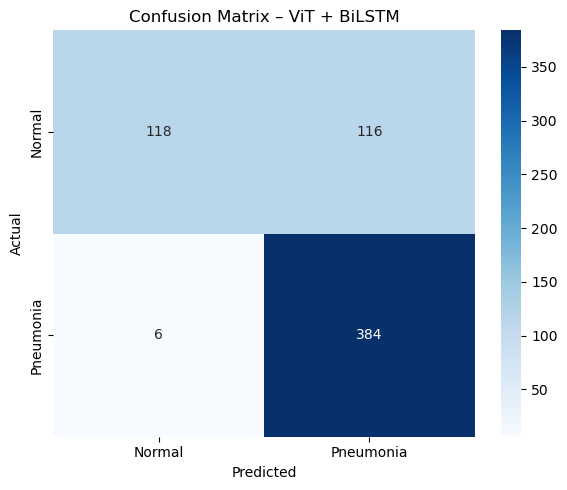

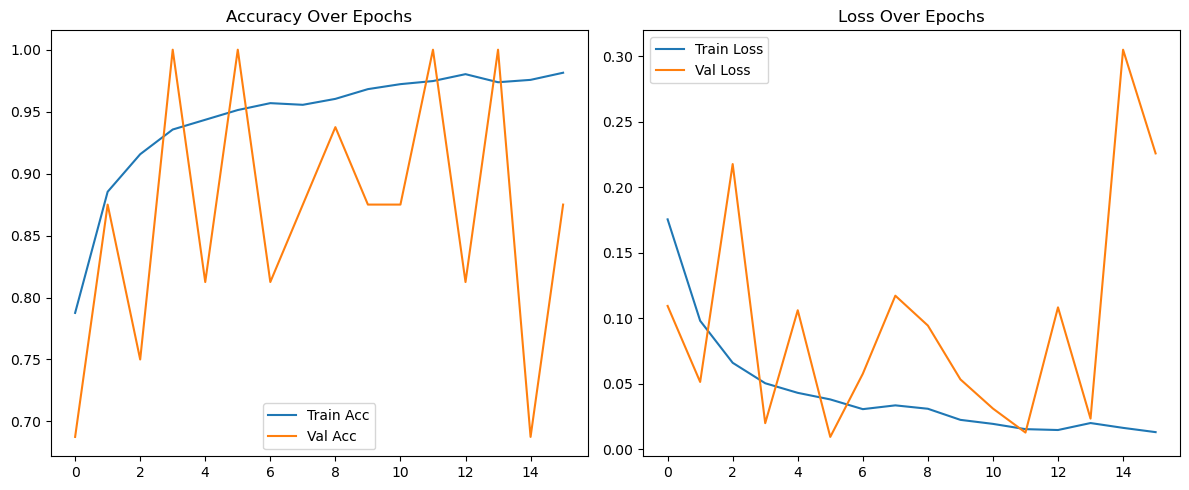

In [5]:
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import BinaryFocalCrossentropy

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Paths
# ============================================================
# Folder where you saved ViT features earlier
# Structure:
#   vit_features/
#       train/NORMAL/*.npy
#       train/PNEUMONIA/*.npy
#       val/NORMAL/*.npy
#       ...
feature_dir = r"D://archive (11)//vit_features"
splits = ["train", "val", "test"]

# ============================================================
# 2️⃣ Load Features (X: (N, T, D), y: (N,))
# ============================================================
def load_features(split):
    X = []
    y = []

    for class_name in ["NORMAL", "PNEUMONIA"]:
        class_dir = os.path.join(feature_dir, split, class_name)
        if not os.path.exists(class_dir):
            raise ValueError(f"Missing directory: {class_dir}")

        for filename in os.listdir(class_dir):
            if not filename.endswith(".npy"):
                continue

            filepath = os.path.join(class_dir, filename)
            feats = np.load(filepath)  # expected (num_tokens, dim) or (1, num_tokens, dim)

            # Fix shapes if needed
            if feats.ndim == 3:
                # (1, T, D) -> (T, D)
                feats = feats.squeeze(0)
            elif feats.ndim == 2:
                pass  # (T, D) already
            else:
                print(f"[WARN] Skipping {filepath}, unexpected shape {feats.shape}")
                continue

            X.append(feats)
            y.append(1 if class_name == "PNEUMONIA" else 0)

    X = np.array(X, dtype=np.float32)  # (N, T, D)
    y = np.array(y, dtype=np.int32)

    print(f"{split.upper()} -> X: {X.shape}, y: {y.shape}, positives: {np.sum(y)}")
    return X, y

print("🔄 Loading ViT features...")
X_train, y_train = load_features("train")
X_val,   y_val   = load_features("val")
X_test,  y_test  = load_features("test")

# ============================================================
# 3️⃣ Class Weights (handle imbalance)
# ============================================================
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights_dict)

# ============================================================
# 4️⃣ Build ViT + BiLSTM Classifier
# ============================================================
timesteps   = X_train.shape[1]   # sequence length (num_tokens)
feature_dim = X_train.shape[2]   # embedding dimension

input_layer = Input(shape=(timesteps, feature_dim))

x = Bidirectional(LSTM(256, return_sequences=True))(input_layer)
x = Dropout(0.5)(x)

x = Bidirectional(LSTM(128))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)

output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=input_layer, outputs=output)

optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-4, amsgrad=True)

model.compile(
    optimizer=optimizer,
    loss=BinaryFocalCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

# ============================================================
# 5️⃣ LR Scheduler + Early Stopping
# ============================================================
def cosine_lr_schedule(epoch, lr):
    # same style as your previous models
    return 1e-4 * (0.5 * (1 + np.cos(np.pi * epoch / 50)))

callbacks = [
    LearningRateScheduler(cosine_lr_schedule),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

# ============================================================
# 6️⃣ Train Model
# ============================================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,                # reduce to 16 if you get OOM
    callbacks=callbacks,
    class_weight=class_weights_dict
)

# Optional: save main model
model.save("ViT_BiLSTM_pneumonia_model.h5")
print("✅ ViT + BiLSTM model saved as ViT_BiLSTM_pneumonia_model.h5")

# ============================================================
# 7️⃣ Evaluate on Test Set
# ============================================================
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (ViT + BiLSTM): {test_acc * 100:.2f}%")

# ============================================================
# 8️⃣ Confusion Matrix & Classification Report
# ============================================================
y_prob = model.predict(X_test).ravel()
THRESH = 0.5  # you can tune this later (e.g., 0.4 for higher pneumonia recall)
y_pred = (y_prob > THRESH).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["NORMAL", "PNEUMONIA"]))

# ============================================================
# 9️⃣ Plot Confusion Matrix
# ============================================================
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Pneumonia"],
    yticklabels=["Normal", "Pneumonia"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ViT + BiLSTM")
plt.tight_layout()
plt.show()

# ============================================================
# 🔟 Plot Training Curves
# ============================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.tight_layout()
plt.show()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 624 images belonging to 2 classes.


C:\Users\Devraj\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 933ms/step
Confusion Matrix:
[[174  60]
 [ 60 330]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.74      0.74      0.74       234
   PNEUMONIA       0.85      0.85      0.85       390

    accuracy                           0.81       624
   macro avg       0.79      0.79      0.79       624
weighted avg       0.81      0.81      0.81       624


Sample image path: C://archive (11)//chest_xray\test\NORMAL\IM-0001-0001.jpeg
True label: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Model pneumonia probability: 0.2666
Predicted label: NORMAL

Explanation:
The model predicts NORMAL with probability 0.73. The Grad-CAM map indicates which regions were inspected by the model; no strongly highlighted suspicious area is seen, supporting a normal prediction.


C:\Users\Devraj\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_3']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


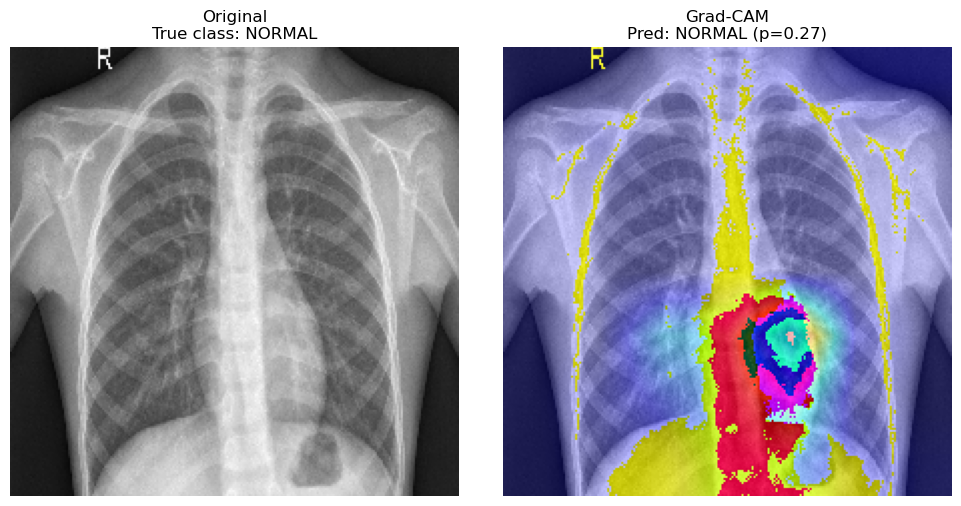

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# ============================================================
# 1️⃣ Paths & Basic Settings
# ============================================================
model_path  = r"ResNet50_pneumonia_model.h5"  # your saved model
dataset_dir = r"C://archive (11)//chest_xray"
test_dir    = os.path.join(dataset_dir, "test")

IMG_SIZE   = (224, 224)
BATCH_SIZE = 32

# ============================================================
# 2️⃣ Load Trained Model
# ============================================================
model = load_model(model_path, compile=False)
model.summary()

# Last conv layer name for standard Keras ResNet50
LAST_CONV_LAYER_NAME = "conv5_block3_out"

# ============================================================
# 3️⃣ Build Test Data Generator (fix for NameError)
# ============================================================
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # IMPORTANT: keep order consistent with .classes
)

# ============================================================
# 4️⃣ Evaluate Model + Confusion Matrix + Report
# ============================================================
# Raw labels
y_true = test_data.classes                         # shape (N,)

# Predicted probabilities (p(pneumonia))
y_prob = model.predict(test_data).ravel()          # shape (N,)

# Threshold = 0.5 (you can tune this later)
THRESH = 0.5
y_pred = (y_prob > THRESH).astype(int)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred,
                            target_names=["NORMAL", "PNEUMONIA"]))

# ============================================================
# 5️⃣ Grad-CAM Function
# ============================================================
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    """
    img_array: (1, H, W, 3), values in [0,1]
    """
    last_conv_layer = model.get_layer(last_conv_layer_name)

    grad_model = Model(
        [model.inputs],
        [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))   # (C,)

    conv_outputs = conv_outputs[0]                         # (H, W, C)
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis] # (H, W, 1)
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

# ============================================================
# 6️⃣ Simple Explainability Helper
# ============================================================
def explain_prediction(prob, threshold=0.5):
    """
    prob: probability of pneumonia (model output)
    """
    if prob >= threshold:
        label = "PNEUMONIA"
        explanation = (
            f"The model predicts PNEUMONIA with probability {prob:.2f}. "
            "Bright regions in the Grad-CAM map (red/yellow) highlight lung areas "
            "that contributed most to this pneumonia prediction, often corresponding "
            "to suspicious opacities or abnormal lung textures."
        )
    else:
        label = "NORMAL"
        explanation = (
            f"The model predicts NORMAL with probability {1 - prob:.2f}. "
            "The Grad-CAM map indicates which regions were inspected by the model; "
            "no strongly highlighted suspicious area is seen, supporting a normal prediction."
        )
    return label, explanation

# ============================================================
# 7️⃣ Pick a Sample Test Image (by index)
# ============================================================
# You can change idx to look at other images
idx = 0  # first test image

# File path for this test image
filename = test_data.filenames[idx]  # e.g. "PNEUMONIA/person123_...jpeg"
sample_path = os.path.join(test_dir, filename)

true_label_idx = y_true[idx]
true_label = "NORMAL" if true_label_idx == 0 else "PNEUMONIA"

print("\nSample image path:", sample_path)
print("True label:", true_label)

# Load and preprocess image
img = tf.keras.preprocessing.image.load_img(sample_path, target_size=IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
input_tensor = np.expand_dims(img_array, axis=0)  # (1, H, W, 3)

# ============================================================
# 8️⃣ Run Prediction + Explanation for this Image
# ============================================================
prob_pneu = float(model.predict(input_tensor)[0][0])
pred_label, text_explanation = explain_prediction(prob_pneu, threshold=THRESH)

print(f"Model pneumonia probability: {prob_pneu:.4f}")
print(f"Predicted label: {pred_label}")
print("\nExplanation:")
print(text_explanation)

# ============================================================
# 9️⃣ Create Grad-CAM Heatmap for this Image
# ============================================================
heatmap = make_gradcam_heatmap(input_tensor, model, LAST_CONV_LAYER_NAME)

# Resize heatmap to image size
heatmap_resized = cv2.resize(heatmap, IMG_SIZE)
heatmap_uint8   = np.uint8(255 * heatmap_resized)

# Apply color map
heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

# Overlay on original image
orig_uint8 = (img_array * 255).astype("uint8")
alpha = 0.4
superimposed_img = heatmap_color * alpha + orig_uint8

# ============================================================
# 🔟 Display Original + Grad-CAM
# ============================================================
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title(f"Original\nTrue class: {true_label}")
plt.imshow(orig_uint8)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Grad-CAM\nPred: {pred_label} (p={prob_pneu:.2f})")
plt.imshow(superimposed_img.astype("uint8"))
plt.axis("off")

plt.tight_layout()
plt.show()


🔄 Loading ViT features...
TRAIN -> X: (5216, 197, 768), y: (5216,), positives: 3875
VAL -> X: (16, 197, 768), y: (16,), positives: 8
TEST -> X: (624, 197, 768), y: (624,), positives: 390
Class weights: {0: 1.9448173005219984, 1: 0.6730322580645162}


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 197, 768)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 197, 512)            │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 197, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,797,825 (10.67 MB)

 Trainable params: 2,797,313 (10.67 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7151 - loss: 0.8615
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to ViT_BiLSTM_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7159 - loss: 0.8606 - val_accuracy: 0.7500 - val_loss: 0.7477 - learning_rate: 2.0000e-04
Epoch 2/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9390 - loss: 0.5390
Epoch 2: val_accuracy improved from 0.75000 to 1.00000, saving model to ViT_BiLSTM_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.9390 - loss: 0.5389 - val_accuracy: 1.0000 - val_loss: 0.4479 - learning_rate: 1.9992e-04
Epoch 3/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9488 - loss: 0.4839
Epoch 3: val_accuracy did not improve from 1.00000
163/163 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9487 - loss: 0.4840 - val_accuracy: 1.0000 - val_loss: 0.4041 - learning_rate: 1.9969e-04
Epoch 4/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9523 - loss: 0.4672
Epoch 4: val_accuracy did not improve from 1.00000
163/163 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9523 - loss: 0.4672 - val_accuracy: 0.7500 - val_loss: 1.1088 - learning_rate: 1.9931e-04
Epoch 5/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9625 - loss: 0.4431
Epoch 5: val_accuracy did not improve from 1.00000
163/163 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9625 - loss: 0.4432 - val_accuracy: 1.0000 - val_loss: 0.3734 - learning_rate: 1.9877e-04
Epoch 6/

✅ Best model saved as ViT_BiLSTM_best.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.6741 - loss: 2.0903
Test Accuracy (ViT + BiLSTM, improved): 79.81%
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step
Confusion Matrix:
[[111 123]
 [  3 387]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.47      0.64       234
   PNEUMONIA       0.76      0.99      0.86       390

    accuracy                           0.80       624
   macro avg       0.87      0.73      0.75       624
weighted avg       0.84      0.80      0.78       624



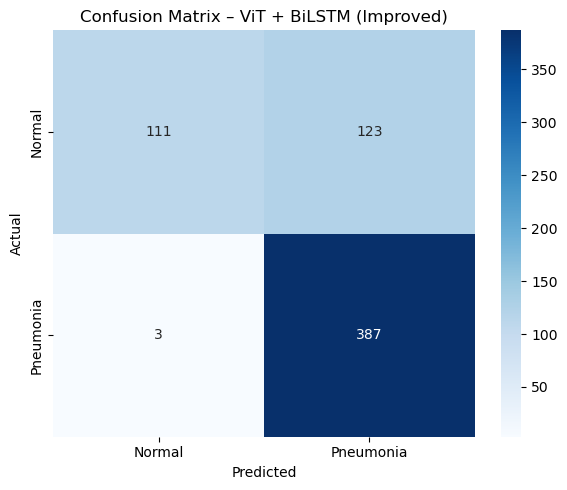

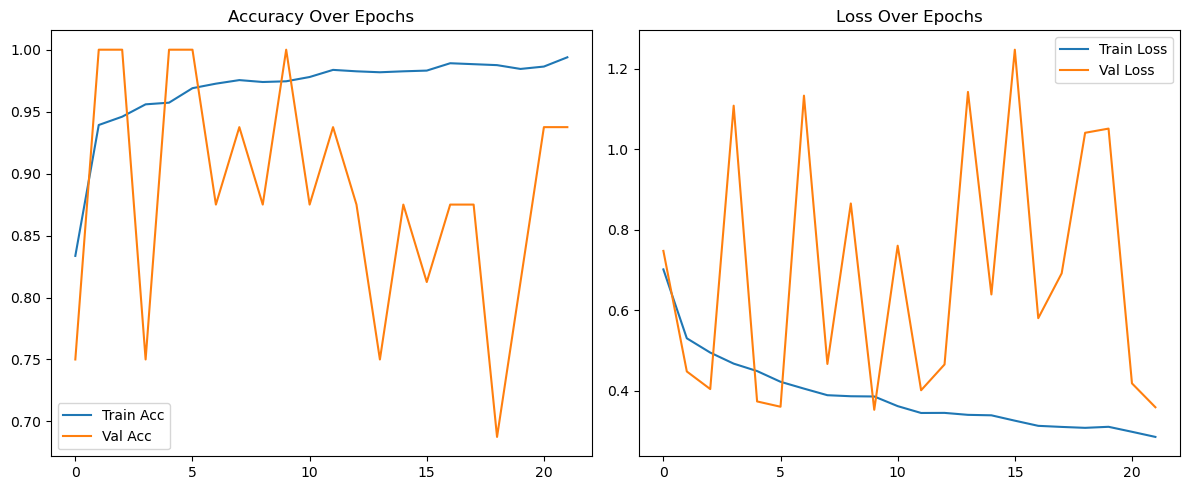

In [7]:
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Paths
# ============================================================
feature_dir = r"D://archive (11)//vit_features"   # where your .npy features are
splits = ["train", "val", "test"]

# ============================================================
# 2️⃣ Load Features (X: (N, T, D), y: (N,))
# ============================================================
def load_features(split):
    X = []
    y = []

    for class_name in ["NORMAL", "PNEUMONIA"]:
        class_dir = os.path.join(feature_dir, split, class_name)
        if not os.path.exists(class_dir):
            raise ValueError(f"Missing directory: {class_dir}")

        for filename in os.listdir(class_dir):
            if not filename.endswith(".npy"):
                continue

            filepath = os.path.join(class_dir, filename)
            feats = np.load(filepath)  # (T, D) or (1, T, D)

            # Fix shapes if needed
            if feats.ndim == 3:
                feats = feats.squeeze(0)   # (T, D)
            elif feats.ndim != 2:
                print(f"[WARN] Skipping {filepath}, unexpected shape {feats.shape}")
                continue

            X.append(feats)
            y.append(1 if class_name == "PNEUMONIA" else 0)

    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.int32)

    print(f"{split.upper()} -> X: {X.shape}, y: {y.shape}, positives: {np.sum(y)}")
    return X, y

print("🔄 Loading ViT features...")
X_train, y_train = load_features("train")
X_val,   y_val   = load_features("val")
X_test,  y_test  = load_features("test")

# ============================================================
# 3️⃣ Class Weights (handle imbalance)
# ============================================================
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights_dict)

# ============================================================
# 4️⃣ Build Stronger ViT + BiLSTM Model
# ============================================================
timesteps   = X_train.shape[1]   # sequence length (num_tokens)
feature_dim = X_train.shape[2]   # embedding dimension

l2_reg = 1e-4

input_layer = Input(shape=(timesteps, feature_dim))

x = Bidirectional(
        LSTM(
            256,
            return_sequences=True,
            kernel_regularizer=regularizers.l2(l2_reg),
            recurrent_regularizer=regularizers.l2(l2_reg)
        )
    )(input_layer)
x = Dropout(0.5)(x)

x = Bidirectional(
        LSTM(
            128,
            return_sequences=False,
            kernel_regularizer=regularizers.l2(l2_reg),
            recurrent_regularizer=regularizers.l2(l2_reg)
        )
    )(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(
        128,
        activation="relu",
        kernel_regularizer=regularizers.l2(l2_reg)
    )(x)
x = Dropout(0.3)(x)

x = Dense(
        64,
        activation="relu",
        kernel_regularizer=regularizers.l2(l2_reg)
    )(x)
x = Dropout(0.3)(x)

output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=input_layer, outputs=output)

optimizer = AdamW(learning_rate=2e-4, weight_decay=1e-4, amsgrad=True)

# 🔁 IMPORTANT CHANGE: use binary_crossentropy instead of focal
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ============================================================
# 5️⃣ LR Scheduler + Early Stopping + Checkpoint
# ============================================================
def cosine_lr_schedule(epoch, lr):
    return 2e-4 * (0.5 * (1 + np.cos(np.pi * epoch / 80)))

checkpoint = ModelCheckpoint(
    "ViT_BiLSTM_best.h5",
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=12,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(cosine_lr_schedule)

callbacks = [checkpoint, early_stop, lr_scheduler]

# ============================================================
# 6️⃣ Train Model
# ============================================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=80,              # more epochs; early stopping will stop earlier
    batch_size=32,          # lower to 16 if OOM
    callbacks=callbacks,
    class_weight=class_weights_dict
)

print("✅ Best model saved as ViT_BiLSTM_best.h5")

# Optionally save final
model.save("ViT_BiLSTM_last.h5")

# ============================================================
# 7️⃣ Evaluate on Test Set (using the best weights in memory)
# ============================================================
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (ViT + BiLSTM, improved): {test_acc * 100:.2f}%")

# ============================================================
# 8️⃣ Confusion Matrix & Classification Report
# ============================================================
y_prob = model.predict(X_test).ravel()
THRESH = 0.5  # can tune later (e.g., 0.4 for higher pneumonia recall)
y_pred = (y_prob > THRESH).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["NORMAL", "PNEUMONIA"]))

# ============================================================
# 9️⃣ Plot Confusion Matrix
# ============================================================
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Pneumonia"],
    yticklabels=["Normal", "Pneumonia"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ViT + BiLSTM (Improved)")
plt.tight_layout()
plt.show()

# ============================================================
# 🔟 Plot Training Curves
# ============================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.tight_layout()
plt.show()
